# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4 - Grading Rubric

### Assigned November 14 25 - Due November 24
### Late Penalty: 5%/day


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%

---

## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [3]:
import numpy as np

# pt 1 - Generate the following in numpy

#Start by defining the number of participants, conditions, and trials 

participants = np.arange(1, 41) #np.arange will generate numbers starting from 1 up to 40 (excluding 41). This function returns an array of values from 1-40 instead of a list.
conditions = np.array(["congruent", "incongruent"]) #Two conditions, either congruent or incongruent 
trials = 50 #Number of trials set per condition 

#Putting together the number of trials per condition and participant 

participant_id = np.repeat(participants, trials * 2) #Defining how many inputs participants will have. Each participant will have a total of 100 trials (50x2). np.repeat is a function that repeats each participant ID 100 times. (Repeat each element after themselves)
# https://numpy.org/doc/2.3/reference/generated/numpy.repeat.html - found np.repeat from numpy website

condition_detail = np.tile(np.repeat(conditions, trials), len(participants)) #Repeats the amount of trials per each condition (50 for congruent, and 50 for incongruent). Len (participants) - does this once for each participant. np.tile - repeats the first object (condition) the number of times depending on the second object (trials). 
# https://numpy.org/doc/2.3/reference/generated/numpy.tile.html - found np.tile on numpy website. 

#Setting RT detail 

mean_rt = np.where(condition_detail == "congruent", 520, 610) #Creates an array where - if condition labels are congruent(true) = 520, if not (false) = 620 (incongruent trials). np.where function - returns elements (given RT) depending on TRUE/FALSE label from condition detail object. 
# https://numpy.org/doc/2.3/reference/generated/numpy.where.html - np.where function found on numpy website 
sd_rt   = 70 #Both conditions set to have a standard dev of 70

reaction_times = np.random.normal(mean_rt, sd_rt) #Generating one RT per trial depending on condition, with the same sd. np.random.normal - used to draw random samples from a normal distribution. 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html - detail on np.random.normal from numpy site 

# Generating the uniform noise to all RTs 

reaction_times += np.random.uniform(-20, 20, size=len(reaction_times)) #Taking the RTs and adding random noise to each RT. Generates random numbers uniformly distributed between the values (-20 and 20), size - the amount of numbers to generate (length of the RT array). 
# https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html - detail on this function was found on this website. 



import pandas as pd 

#Creating a dataframe 

df = pd.DataFrame({ #pd.DataFrame - combines multiple arrays into a table with rows/columns 
    "participant": participant_id, #Combine participant IDs with logs for 100 trials (for each trial) 
    "condition": condition_detail, #Combine each condition label with the condition detail 
    "rt": reaction_times #Combines RT with the RT times created (with noise) 
})

#Dictionary keys - participant, condition, rt - all correspond to an array. 

# Print out the header and summary stats for RT 

print(df.head(10)) #df.head - Shows me the first 10 rows, this is a way to check the layout and ensure the dataframe was correctly done 

print(df.describe()) #df.describe - shows the summary stats for numeric columns (only RT in this example) 

# for df.head and df.describe - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


##See output below 

   participant  condition          rt
0            1  congruent  540.966129
1            1  congruent  510.409826
2            1  congruent  473.427306
3            1  congruent  530.362982
4            1  congruent  493.339863
5            1  congruent  581.589913
6            1  congruent  656.092591
7            1  congruent  500.866291
8            1  congruent  512.642369
9            1  congruent  420.840406
       participant           rt
count   4000.00000  4000.000000
mean      20.50000   563.351593
std       11.54484    83.182202
min        1.00000   281.534252
25%       10.75000   504.649868
50%       20.50000   564.767005
75%       30.25000   620.749524
max       40.00000   847.131245


**Comments:**
- Nice. Nice and clean an efficient. I feel like this shows some of your best understanding of the logic of python.

- Code 6/6, documentation 6/6 **total: 12/12**

## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [4]:
#Count the number of trials before cleaning the data 
dirty_trials = len(df) 

#Creating a mask that will determine which RTs are valid based on given parameters 
cleaning_mask = (df["rt"] >= 150) & (df["rt"] <= 1500) #This is a boolean array in which only TRUE when RT is between 150 and 1500, anything else is considered false

#Set a new clean object to the old dataframe while applying the new mask
clean_df = df[cleaning_mask] #This will index the dataframe and keep only the data where the cleaning mask assumptions are true. The new data will then be stored into the cleaned_df object.

#Determine how many trials were removed from the dirty (or original) dataframe
trials_rm = dirty_trials - len(clean_df) #Subtracting the length of the old dataframe with the new one will give us total trials removed
print(f"Number of trials removed: {trials_rm}") #Print out the number of trials removed 

#Applying the given grouping code to clean_df 
by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()
#Begins by grouping the data by each participant and condition (all trials for participant 1 in congruent condition are now one group)
#The RT column is then selected to compute further stats on 
#.mean - calculates the mean RT for each group (e.g., - person 1, congruent) 
# .reset_index() - resets the grouping back to a normal dataframe so that participant, and condition are back to being separate columns (no longer paired)

#To analyze the data, it needs to be paired participant per condition (to compare the mean differences across conditions), rather than working with all trials individually which is not always meaningful 

##See below the outputs when I ran the code. No trials removed (all were within the set parameters) and some error in jupyter history saving (not directed at my code or dataframe) 

Number of trials removed: 0


**Comments:**
- Good!
- code: 3/3, documentation 3/3, **total: 5/6**

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.

In [6]:
# Computing RT without groupby 

mean_con = clean_df[clean_df["condition"] == "congruent"]["rt"].mean() #Takes and compares every row in the condition group to the string condition congruent (returning a boolean mask). Acts as a filter for the dataframe, only selecting the rows where the mask is true (if condition = congruent)
#New dataframe will contain only congruent trials, and just select data from RT columns 
#.mean - calculates the mean RT from those data series
# Overall meaning is - Select the cleaned dataframe - select only the congruent rows - select only those trial RTs - compute mean RT from those rts.

mean_incon = clean_df[clean_df["condition"] == "incongruent"]["rt"].mean() #Doing the same thing but for the incongruent trials. 
#Takes data from cleaned dataframe, selects the incongruent trials from condition, and then takes only trial RT data only from those incongruent trials and calculates the mean

print(mean_con, mean_incon) #Print out the mean value from each variable 

# See the output down below 

# Adding an accuracy column 

clean_df["accuracy"] = np.random.choice([1, 0], size=len(clean_df), p=[0.8, 0.2]) #Adding an accuracy column to my clean dataframe.
#Making the accuracy column equal to random choice of data points ranging from 0-1. Setting the size to equal the length of the cleaned dataframe (so their will be stimulated data for each row in the entire data log)
# p = .08, 0.2 - This sets the probability of the 1 or 0 appearing (80% change of correct/1; 20% change of incorrect/0)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html - Website that helped me understand the parameters when using np.random.choice

print(clean_df.head()) #Checking if it worked with the .head command - it did 

# Calculating RT based on accuracy 

acc_df = clean_df[clean_df["accuracy"] == 1] #Filtering to only select correct trials
# Accurate dataframe = takes from clean_df in the accuracy column, and only takes taka equal to 1 (correct trials)

mean_rtAcc = acc_df.groupby("condition")["rt"].mean() #Mean_rtAcc is equal to new dataframe(only correct trials), groups the data based on values in my condition variable (congruent, incongruent)
#Within each group (congruent, incongruent) take the associated RT of correct trials and calculate the mean 
#Average RT is then calculated for each separate group (only for correct trials) 

print(mean_rtAcc) #Print out the new mean RT based on correct trials 

# See output below 

517.872821807641 608.8303633319019
   participant  condition          rt  accuracy
0            1  congruent  540.966129         1
1            1  congruent  510.409826         1
2            1  congruent  473.427306         1
3            1  congruent  530.362982         1
4            1  congruent  493.339863         1


**comments:**
- Good, although make sure it's clear what's being printed. 
- code: 6/6, documentation: 5/6 **total: 11/12**

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)

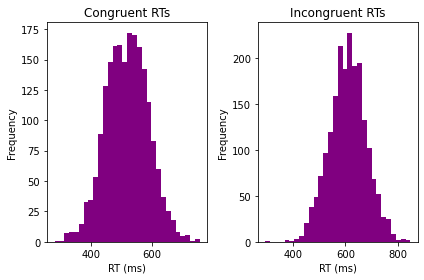

In [7]:

import matplotlib.pyplot as plt ##Importing the matplot library needed for this question

rt_con = clean_df[clean_df["condition"] == "congruent"]["rt"] #Applying my mask filter to the clean_df to only include congruent RT trials 

rt_incon = clean_df[clean_df["condition"] == "incongruent"]["rt"] #Applying another mask filter to the clean_df to only include the incongruent RT trials 
# Rt_con and rt_incon will become an array of RTs for the congruent and incongruent trials, allowing me to then graph them separately 

fig = plt.figure() #Creating an empty figure, which I can later add my two plots into 

# Create a subplot for congruent RT trial data to be plotted 
axes1 = fig.add_subplot(1,2,1) #Adding my first subplot (axes1) to the figure, where the grid layout is set at 1 row, 2 columns, and the first subplot.
#Setting up all the parameters for the subplot 
axes1.set_title("Congruent RTs") #Setting the title for the first subplot (Congruent RT trials)
axes1.set_xlabel("RT (ms)") #Setting the x-axis label for the first subplot 
axes1.set_ylabel("Frequency") #Setting the y-axis label for the first subplot 
axes1.hist(rt_con, bins=30, color='purple') #Plotting a histogram of data from rt_con on axis 1, with a colour parameter so that the histogram appears purple


# Create a subplot for congruent RT trial data to be plotted 
axes2 = fig.add_subplot(1,2,2) #Adding the second subplot (axes2) to the figure, where the grid layout is now 1 row, 2 columns, and second subplot. 
axes2.set_title("Incongruent RTs") #Setting the title for the second subplot (incongruent RT trials)
axes2.set_xlabel("RT (ms)") #Setting the x-axis label for the second subplot 
axes2.set_ylabel("Frequency") #Setting the y-axis label for the second subplot
axes2.hist(rt_incon, bins=30, color='purple')#Plotting a histogram of data from rt_incon on axis 2, with a colour parameter so that the histogram appears purple  

fig.tight_layout() #Adding the .tight_layout function so that the spacing between subplots is adjusted properly (nothing overlaps) 
plt.show() #Displaying the figure on the screen

# References for this code, I relied heavily on lecture content and detail from matplotlib website - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html# 

#See the plots below 

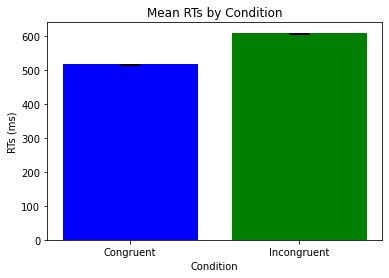

In [8]:
# Bar graph for mean RTs of congruent and incongruent 

# self Note - Can use mean_con and mean_incon from mask earlier - but for clarity will compute again

# Compute standard error bars and means again

#Computing means and SE of congruent trials, placing the data in two objects (mean_con, se_con)
mean_con = rt_con.mean() 
se_con = rt_con.sem()

#Computing means and SE of incongruent trials, placing this data in two objects (mean_incon, se_incon)
mean_incon = rt_incon.mean()
se_incon = rt_incon.sem()

#Putting mean and SE data in placeholders (makes it easier to make the figure) 
conditions = ["Congruent", "Incongruent"] #Storing condition information in conditions 
means = [mean_con, mean_incon] #Storing the new means calculated for congruent and incongruent trials in means
errors = [se_con, se_incon] #Storing the new standard errors calculated for congruent and incongruent trials in errors

#Making my bar graph 

fig, ax = plt.subplots() #Creating an empty figure and axis to put plot in 

ax.bar(conditions, means, yerr=errors, capsize = 10, color = ['blue', 'green']) #Creating the bar graph. Conditions will be the positions of the bars, means will determine the data or height. yerr adds the error bars based on the data from errors. Capsize determines the size of the errorbars (set to ten to make it more visible). Colors determines the two different bar colours (blue and green)
# Detail on.bar attributes came from the matplotlib website and lecture - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

#Adding detail 
ax.set_title ("Mean RTs by Condition") #Adding a title to my plot 
ax.set_xlabel("Condition") #Adding an x-axis label 
ax.set_ylabel("RTs (ms)") #Adding a y-axis label 

plt.show() #Showing the plot 


# See output below 

**Commnents:**
- Good! 
- code 6/6, documentation 6/6. **total: 12/12**

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


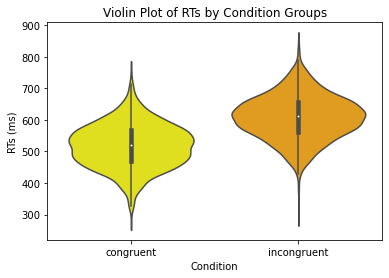

In [9]:
# Making a Violin Plot 

import seaborn as sns #Importing seaborn library for this question

plt.figure() #Creating an empty figure for my plot 

# Creating the violin 
sns.violinplot( #This code creates the violin plot.
    x ="condition",  # X = condition - takes the condition column in the clean-df (congruent vs incongruent) as the x-axis.
    y ="rt", # y = rt - takes the rt column in clean_df for the y -axis . What gets plotted in/for each condition. 
    data=clean_df, # What data to take from (will pull from the clean dataframe for the condition and rt columns
    palette=["yellow","orange"], #Assigning yellow and orange to the violin balls 
    legend = False # I believe this is to hide the legend, but I only used it because this version said it needed to be used when you call palette without a hue (which I did) 
)

# Setting figure parameters 
plt.title("Violin Plot of RTs by Condition Groups") # Setting a title to the plot 
plt.xlabel("Condition") # Setting a x-axis label 
plt.ylabel("RTs (ms)") # Setting a y-axis label 

plt.show() #Showing the plot 

# I used the seaborn website to see examples and learn about the violinplot parameters. - https://seaborn.pydata.org/generated/seaborn.violinplot.html

# See output below 

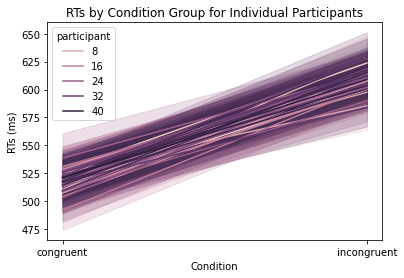

In [10]:
# Making a line plot 

plt.figure() # Making an empty figure to put my plot into 

#Setting sns.lineplot (creating a line plot and setting the parameters)
sns.lineplot(x="condition", # Setting the x-axis values to condition (congruent, incongruent) 
             y="rt", # Setting the y-axis values to be taken from RT column 
             hue="participant", #hue parameter - will create a separate line for each participant
             data=clean_df) # Telling it where to get the data, in this case from my cleaned dataframe

# Setting additional parameters 
plt.title("RTs by Condition Group for Individual Participants") #Setting a title for figure 
plt.xlabel("Condition") # Setting a x-axis label 
plt.ylabel("RTs (ms)") # Setting a y-axis label 

plt.show() #Show the figure 

# Detail on lineplots in seaborn where taken here (detail on hue) - https://seaborn.pydata.org/generated/seaborn.lineplot.html
#Output Below 

**Comments:**
- Good! I did want only 40 lines (one for each participant) but I didn't make that clear.
- code: 3/3, documentation: 3/3, **total: 6/6**


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


In [11]:
import numpy as np #Importing packages 
from scipy.optimize import curve_fit #Curve_fit from script optimize is a library that will fit a custom function to data

# Defining the data 
loads = np.array([1, 2, 3, 4, 5, 6]) #Memory load values 
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939]) # Visual working memory capacity for each load 

# Defining the linear model in a function
def linear(load, a, b, k_break): #taking from load data, a = slope (rate of increase), b = intercept (when load is 0), k_break - breakpoint (no longer increasing - breaks on k) 
    return np.where(load<=k_break, a * load + b, a * k_break + b) #np.where will check the statement or condition for each object in the array. 
#load <=k_break - checks all memory objects against the breakpoint 
# a * load + b - linear growth (used if the load is greater or equal to breaking point (k increases with load) - calculates the increase 
# a * k_break + b - flat part of equation - when load is less than k_break (k stays constant) - calculates flat value 

#Fitting curve 
parameters_l, _ = curve_fit(linear, loads, k) #putting the curve_fit data in parameters_linear (have the empty, _ - to avoid covariance matrix)
#Using the curve_fit function from scipty - it will find the best linear parameters for the two data sets and put it into the parameters_l object

slopel_a, interceptl_b, break_k = parameters_l #assigning the values in parameters_l to meaningful names (easier to follow) 

#Printing out the values 

print("Slope a = ", slopel_a) #Printing out linear slope 
print("Intercept b =", interceptl_b) #Printing out linear intercept 
print("Breakpoint k =", break_k) #Printing out the breakpoint 

#Defining the exponential model in a function 

def exponential(load, a, b, c): #Taking load data, (a,b,c = curve_fit will adjust to fit our data) a = height of the curve, b = how much it increases (rate of increase), c = baseline/ starting point of data.  
    return a * (1-np.exp(-b * load)) + c # np.exp is an exponential function
#(-b * load) - rate increases dramatically then decreases as it reaches high amounts. 
# + c - the starting point shifts to the new curve (change from increase) so that it goes back down to baseline or a starting point of data 
# a * - not really sure what this is doing, perhaps multiplying something on the curve, not sure. 

# Fitting curve 
parameters_e, _ = curve_fit(exponential, loads, k) #putting the curve_fit data in parameters_exponential (have empty , _ to avoid covariance)
# Again this function will find the best  parameters based on the exponential function for the two data sets and store the values into parameters_e object

a_exp, b_exp, c_exp = parameters_e #assigning values in the parameters_e to meaningful objects 

#Printing out results 
print("a =", a_exp) #printing out max increase value (a)
print("b =", b_exp) #printing out rate of increase value (b) 
print("c =", c_exp) #printing out the baseline value (c) 

# I watched a youtube video to understand the curve_fit function listed here - https://www.google.com/search?client=safari&rls=en&q=from+scipy.optimize+import+curve_fit&ie=UTF-8&oe=UTF-8#fpstate=ive&vld=cid:fceaad13,vid:4fp7I2E6FXM,st:0, 
# I also used the scipy website to examine parameters and examples when using the curve_fit function - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

# See outputs for both the linear and exponential data

Slope a =  0.9000000023155116
Intercept b = -5.4028604191244065e-09
Breakpoint k = 3.8853703663773036
a = 4.965352055801861
b = 0.4083248225730042
c = -0.8175333408853817


/Users/semrich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


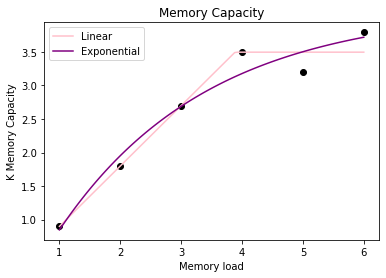

In [12]:
# Plotting the data 

#Switching it back, so that the parameters are all stored in one object, rather then their own (easier to make the figure) 
parameters_l = slopel_a, interceptl_b, break_k 
parameters_e = a_exp, b_exp, c_exp 

#Linespace function (start, stop, number) - This will create 100 spaced values but only show between 1-6 
x_fit = np.linspace(1, 6, 100) 
# np.linespace function (detail found from numpy doc)  -  https://numpy.org/doc/2.3/reference/generated/numpy.linspace.html

#Creating a scatterplot to illustrate both linear and exponential models (avoiding doing two subplots) 
plt.scatter(loads, k, color="black") #plt.scatter - (attaching loads (x-axis), and k data (y-axis) with dot color set at black - Original data is plotted as black dots 
# plt.scatter function (detail found from matplotlib) - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

#Making predicted curves based on my linear and exponential parameters 

plt.plot(x_fit, linear(x_fit, *parameters_l), color="pink", label= 'Linear') #Draws a line depending on the linear model and data points from x_fit 
# Takes values from curve_fit object (parameters_l; slope, intercept, breakpoint) and puts it into the linear function to get y-values for curve 
# Line colour is set to be pink and label is set say linear 

plt.plot(x_fit, exponential(x_fit, *parameters_e), color="purple", label= 'Exponential')#Draws a line depending on the exponential model and data points from x_fit
# Takes values from the curve_fit object (parameters_e; a, b, c) and puts it into the exponential function to get y-values for the curve 
#Line color is set to purple, and label is exponential 

# These sites helped me with the .linespace function and  putting the linear/exonential functions inside the plt.plot https://www.geeksforgeeks.org/python/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

plt.title("Memory Capacity") #Creating a title for the plot 
plt.xlabel("Memory load") #Creating a label for the x-axis 
plt.ylabel("K Memory Capacity") #creating a label for the y-axis 
plt.legend() #Shows the legend with the made labels 

plt.show() #Showing the plot 


#See output below 

**Comments:**

- Good, although I'm a little concerned you may not fully understand everything. E.g., why do you have an 'empty' variable `_` to avoid covariances? Why did you use `linspace` to create 100 values? How does using `*parameters_l` and `*parameters_e` work? (what's with tehe `*`? 
- No need to re-create `parameters_l` and `parameters_e` unless you removed them from memory for some reason. 

- code: 5/6, documentation: 3/6, **total: 8/12**

**Total grade: 54/60**